In [2]:
import cv2, numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

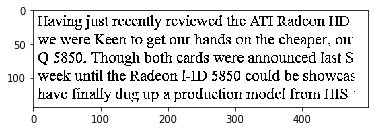

True

In [2]:
image = cv2.imread('ocr-text.png',0)   
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

In [5]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

str = pytesseract.image_to_string('out.png')

print(str)

Having just recently reviewed the ATI Radeon HD

we were Keen to get our hands on the cheaper, ou
Q 5850. Though both cards were announced last S
week until the Radeon 1-ID 5850 could be showcas
have finally dug up a production model from HIS :


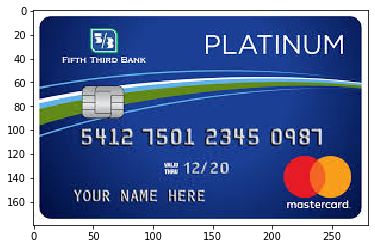

NNO)

5412 1501 2345 0987
are)
SOT Sa ea


In [60]:
str = pytesseract.image_to_string('creditcard02.jpg')
img = cv2.imread("creditcard02.jpg")
imshow("", img)
print(str)

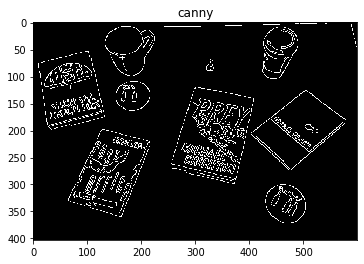

In [31]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)

imshow("canny", edged)

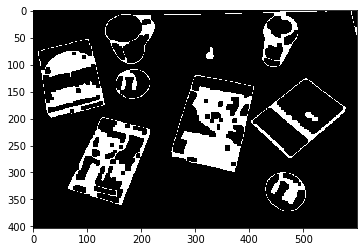

In [32]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

imshow("", closed)

I found 4 books in that image


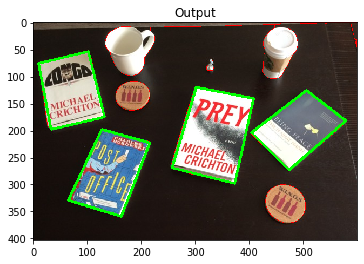

In [35]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

#cv2.drawContours(image, cnts, -1, (0, 0, 255), 1)
cv2.imwrite("out.png", image)
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

In [51]:
from collections import Counter
c = Counter([0,0,0,5,2,2,3,4,5,6])
print(c.most_common())

c = Counter([0,0,0,255,255,0,255])
print(c.most_common())

[(0, 3), (5, 2), (2, 2), (3, 1), (4, 1), (6, 1)]
[(0, 4), (255, 3)]


In [8]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

In [3]:
img = cv2.imread('stone2.jpg')
img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,
                           1, 20, param1=100, param2=30, 
                           minRadius=10, maxRadius=50)

print(circles)

[[[513.5 123.5  26.4]
  [331.5 258.5  26.4]
  [208.5 135.5  26.8]
  [384.5 322.5  27. ]
  [439.5 316.5  27. ]
  [258.5 451.5  27. ]
  [381.5  82.5  27.1]
  [431.5 136.5  27.1]
  [377.5 135.5  26.7]
  [318.5 314.5  27.1]
  [321.5 437.5  27. ]
  [327.5  74.5  26. ]
  [195.5 328.5  26.8]
  [266.5 177.5  25.8]
  [315.5 381.5  27.1]
  [390.5 259.5  26.8]
  [259.5 391.5  29.3]
  [195.5 255.5  27.2]
  [447.5 377.5  27.1]
  [500.5 449.5  27.4]
  [390.5 199.5  29.4]
  [387.5 385.5  27.1]
  [503.5 323.5  26.6]
  [440.5 195.5  27.1]
  [382.5 448.5  26.1]
  [204.5 191.5  27.1]
  [322.5 134.5  28.8]
  [447.5 249.5  25.7]
  [261.5 245.5  29.9]
  [249.5 316.5  28.2]
  [265.5  72.5  25.2]
  [503.5 203.5  27.1]
  [198.5 386.5  28.5]
  [139.5 135.5  28. ]
  [314.5 205.5  28. ]
  [440.5  73.5  27.1]
  [194.5  49.5  31.4]]]


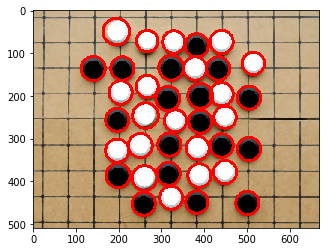

In [9]:
circles = np.uint16(np.around(circles))

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i    
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (x, y), int(r*0.7), (255, 255, 255), -1)            

imshow("", img)

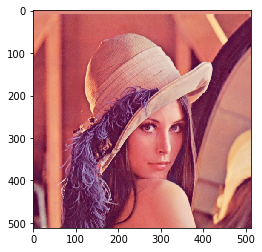

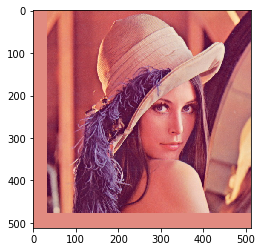

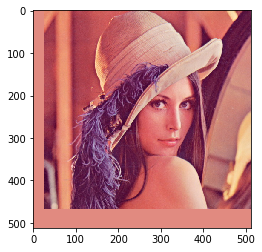

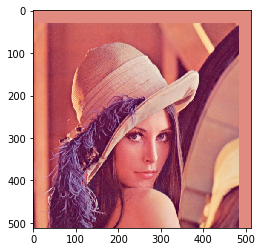

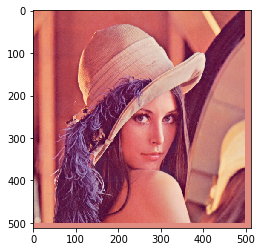

'\nfor i in range( r.shape[0]  ) :\n    M[:,2] = r[i]    \n    dst = cv2.warpAffine(img, M,(width, height),\n              borderValue=( int(c[0]), int(c[1]), int(c[2]) ))\n    imshow("", dst)\n    '

In [44]:
img = cv2.imread('lena.jpg')
height, width = img.shape[:2]

dx = 50
r = np.random.randint(dx*2, size=(5,2))-dx

M = np.float32([
    [1,0,0],
    [0,1,0]])

c = img[0,0]

for p in r.tolist() :
    M[:,2] = p
    dst = cv2.warpAffine(img, M,(width, height),
              borderValue=( int(c[0]), int(c[1]), int(c[2]) ))
    imshow("", dst)

[[  0.60621778   0.35        11.20824764]
 [ -0.35         0.60621778 190.40824764]]
(512, 512, 3)


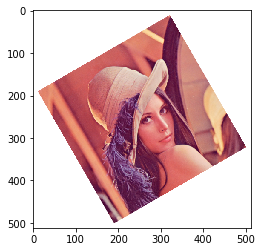

In [51]:
height, width = img.shape[:2]
img_center = (width / 2, height / 2)
M = cv2.getRotationMatrix2D(img_center, 30, 0.7)  
print(M)
rotated_image = cv2.warpAffine(img, M, (width, height), 
        borderValue=(255,255,255))
print(rotated_image.shape)
imshow("", rotated_image)

[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]
[[  0.   0.]
 [811.   0.]
 [  0. 577.]
 [811. 577.]]
[[ 6.11584185e-01 -1.56772284e-01  1.15494658e+01]
 [ 2.26751420e-01  9.26033771e-01 -1.71882333e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


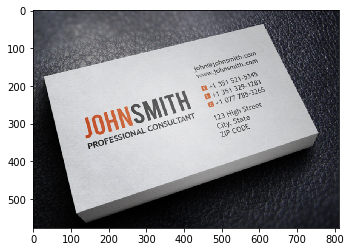

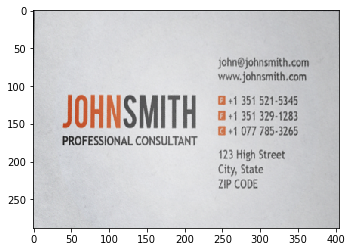

In [8]:
img = cv2.imread("namecard.png")

height, width = img.shape[:2]

# 좌표 순서 - 상단왼쪽 끝, 상단오른쪽 끝, 하단왼쪽 끝, 하단오른쪽 끝

pts1 = np.array([[27, 179], [611,36], [118,534], [754,325]], dtype="float32")
print(pts1)


pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
print(pts2)


pts2 = np.float32([[0,0],[width/2,0],[0,height/2],[width/2,height/2]])

M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)

#img_result = cv2.warpPerspective(img, M, (width,height))
img_result = cv2.warpPerspective(img, M, (int(width/2),int(height/2)))
imshow("", img)
imshow("", img_result)

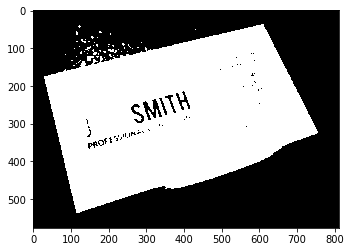

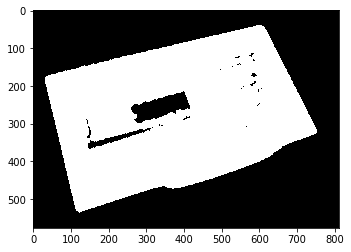

shape=1181  length=2116.4692475795746  approx=4


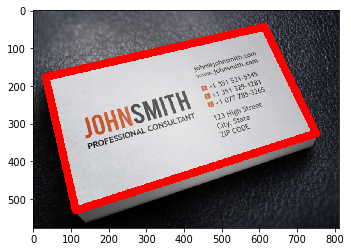

In [42]:
src = cv2.imread("namecard.png")
img = cv2.imread("namecard.png", 0)
img_blur = cv2.GaussianBlur(img, (7,7), 0)
_, binary = cv2.threshold(
    img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("", binary)

opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN,
              cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)),
              iterations=5)
imshow("", opened)


contours, _ = cv2.findContours(opened.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)

for con in contours:
    peri = cv2.arcLength(con, True)
    approx = cv2.approxPolyDP(con, 0.02 * peri, True)    
    print(  f"shape={len(con)}  length={peri}  approx={len(approx)}"  )   
    cv2.drawContours(src, [approx], -1, (0,0,255), 20)
   
imshow("", src)    

In [32]:
idx = [1, 0,2,3]
pts = np.array(approx[idx,0,:])
print(pts)

"""
[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]
"""

[[ 33 177]
 [613  44]
 [113 530]
 [750 326]]


'\n[[ 27. 179.]\n [611.  36.]\n [118. 534.]\n [754. 325.]]\n'

In [43]:
src = cv2.imread("namecard.png")
height, width = src.shape[:2]

pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
M[2,:] = [0,0,1]
print(M)

[[ 1.22316837e+00 -3.13544568e-01  2.30989317e+01]
 [ 4.53502840e-01  1.85206754e+00 -3.43764667e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]
[[ 1.22316837e+00 -3.13544568e-01  2.30989317e+01]
 [ 4.53502840e-01  1.85206754e+00 -3.43764667e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


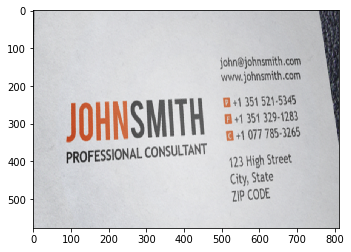

In [44]:
img_result = cv2.warpPerspective(src, M, (width, height))
imshow("", img_result)

In [40]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
str = pytesseract.image_to_string(img_result)
print(str)

john@johnsmith.com
www.johnsmith.com

@ +1 351 521-5345
+1 351 329-1283

+1 077 785-3265
PROFESSIONAL CONSULTANT

123 High Street

City, State

ZIP CODE
